In [26]:
import pandas as pd

In [27]:
df = pd.read_csv("annotations/video-3_annotations_20250921_192623.csv")

In [28]:
df.head()

,video_name,frame_number,state,window_size,mean_distance,median_distance,mean_player1_intensity,median_player1_intensity,mean_player2_intensity,median_player2_intensity,mean_combined_intensity,median_combined_intensity
0,video-3,49,start,50,3.974872,3.945278,0.003874,0.003358,0.020035,0.017434,0.023910,0.021912
1,video-3,99,start,50,3.233930,3.222346,0.013610,0.015027,0.038619,0.031288,0.052229,0.044357
2,video-3,102,active,50,3.194886,3.167015,0.015595,0.015847,0.040265,0.036711,0.055860,0.045067
3,video-3,149,active,50,2.697384,2.759916,0.024652,0.024400,0.049443,0.043739,0.074095,0.073390
4,video-3,199,active,50,1.941079,1.912640,0.025854,0.025638,0.027507,0.020764,0.053361,0.050144


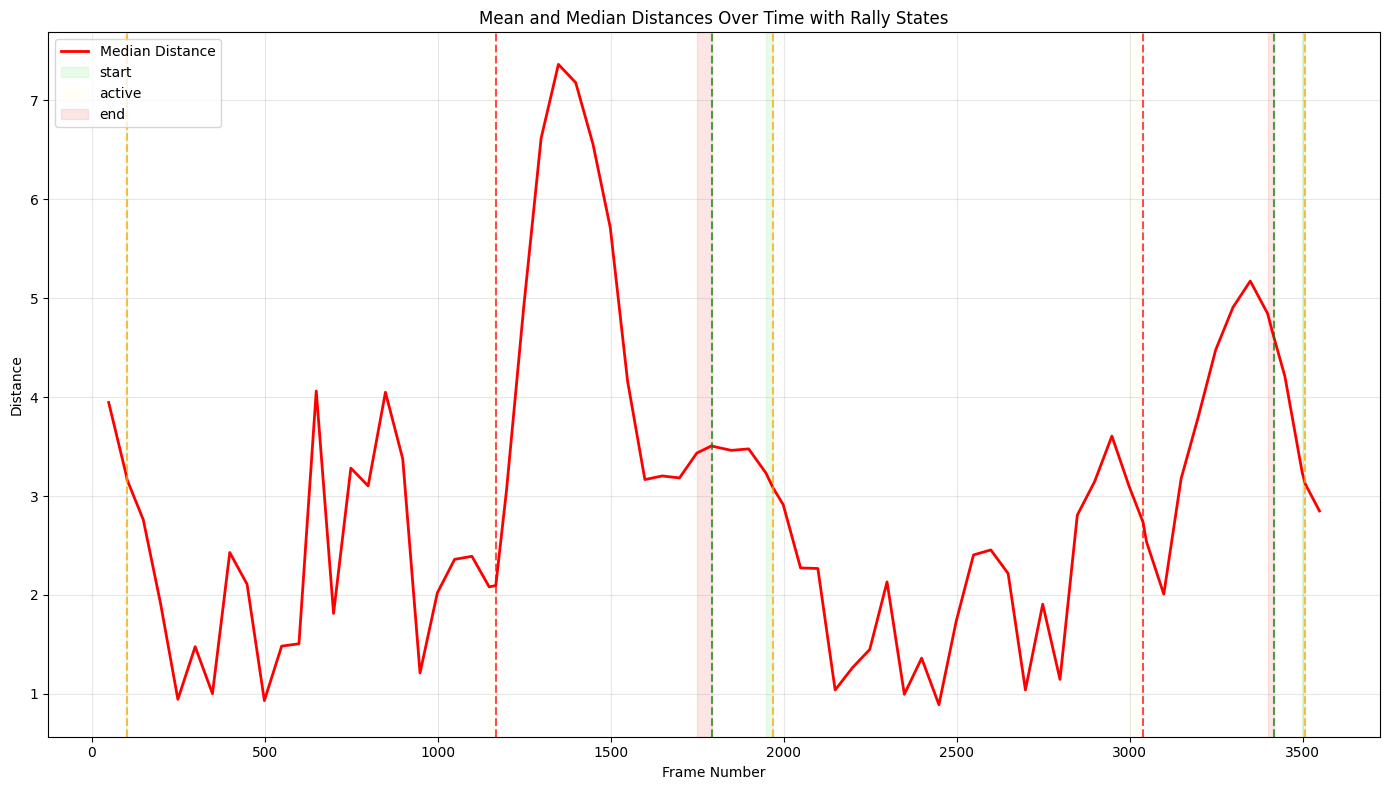

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Plot mean and median distances
# ax.plot(
#     df["frame_number"],
#     df["mean_distance"],
#     label="Mean Distance",
#     linewidth=2,
#     color="blue",
# )
ax.plot(
    df["frame_number"],
    df["median_distance"],
    label="Median Distance",
    linewidth=2,
    color="red",
)

# Add vertical dashed lines and background regions for state changes
state_colors = {
    "start": "lightgreen",
    "active": "lightyellow",
    "end": "lightcoral",
    "inactive": "lightgray",
}
state_line_colors = {
    "start": "green",
    "active": "orange",
    "end": "red",
    "inactive": "gray",
}

# Get state transitions
prev_state = None
prev_frame = None

for i, row in df.iterrows():
    current_state = row["state"]
    current_frame = row["frame_number"]

    if prev_state is not None and prev_state != current_state:
        # Add vertical dashed line at state transition
        ax.axvline(
            x=current_frame,
            color=state_line_colors.get(current_state, "black"),
            linestyle="--",
            alpha=0.7,
            linewidth=1.5,
        )

        # Add background color for previous state region
        if prev_frame is not None:
            ax.axvspan(
                prev_frame,
                current_frame,
                alpha=0.2,
                color=state_colors.get(prev_state, "white"),
                label=(
                    f"{prev_state}"
                    if prev_state not in ax.get_legend_handles_labels()[1]
                    else ""
                ),
            )

    prev_state = current_state
    prev_frame = current_frame

# Add the last region
if prev_state is not None and prev_frame is not None:
    ax.axvspan(
        prev_frame,
        df["frame_number"].max(),
        alpha=0.2,
        color=state_colors.get(prev_state, "white"),
        label=(
            f"{prev_state}"
            if prev_state not in ax.get_legend_handles_labels()[1]
            else ""
        ),
    )

ax.set_xlabel("Frame Number")
ax.set_ylabel("Distance")
ax.set_title("Mean and Median Distances Over Time with Rally States")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
df[df["state"] == "active"].describe().loc[["min", "max", "mean"]][
    ["mean_distance", "mean_combined_intensity"]
]

,mean_distance,mean_combined_intensity
min,1.023388,0.032022
max,4.001248,0.562645
mean,2.233300,0.147383


In [31]:
df[df["state"] == "end"].describe().loc[["min", "max", "mean"]][
    ["mean_distance", "mean_combined_intensity"]
]

,mean_distance,mean_combined_intensity
min,2.088101,0.023431
max,7.312281,0.306693
mean,4.322163,0.076339


In [32]:
df[df["state"] == "start"].describe().loc[["min", "max", "mean"]][
    ["mean_distance", "mean_combined_intensity"]
]

,mean_distance,mean_combined_intensity
min,3.222673,0.014977
max,4.638195,0.052229
mean,3.655240,0.030613
